## **SETUP**

In [ ]:
#setup lightcurve

In [ ]:
pip install lightkurve

In [2]:
from lightkurve import search_targetpixelfile
from lightkurve import TessTargetPixelFile
import lightkurve as lk
import numpy as np

# **Download the star's data**

In [8]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

def download_and_unzip(url, extract_to='.'):
    http_response = urlopen(url)
    zipfile = ZipFile(BytesIO(http_response.read()))
    zipfile.extractall(path=extract_to)

product_group_id = '60844591'
url = 'https://mast.stsci.edu/api/v0.1/Download/bundle.zip?previews=false&obsid=' + product_group_id
destination = '/TESS/'

download_and_unzip(url, destination)

#pixelFile = search_targetpixelfile('TIC 140045538', author="TESS", cadence="long", quarter=4).download()

# Analyze the star's lightcurve and see if there's a transiting planet

(-3.0, 3.0)

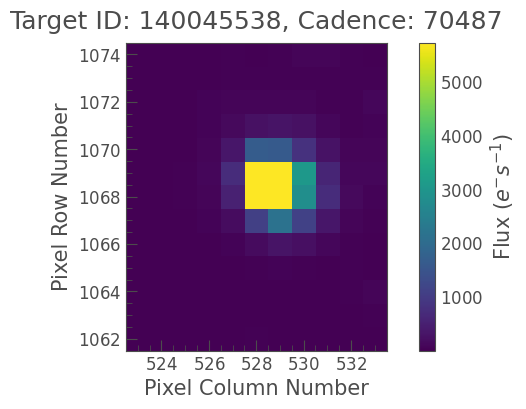

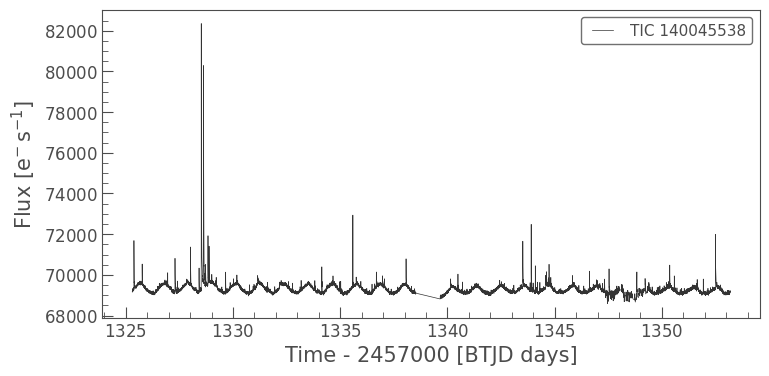

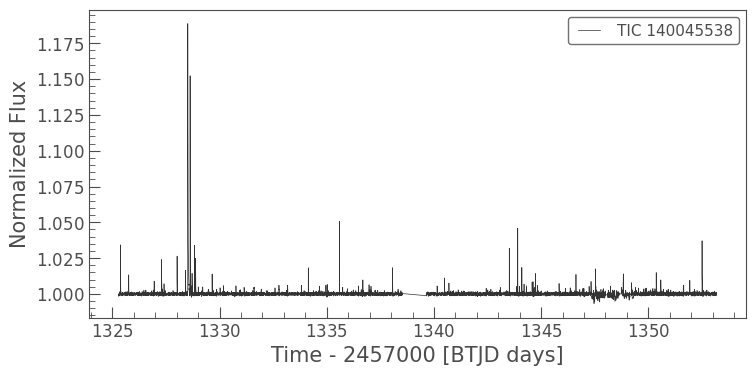

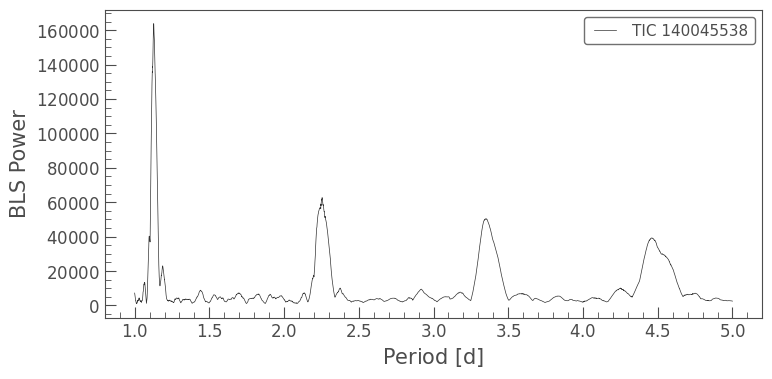

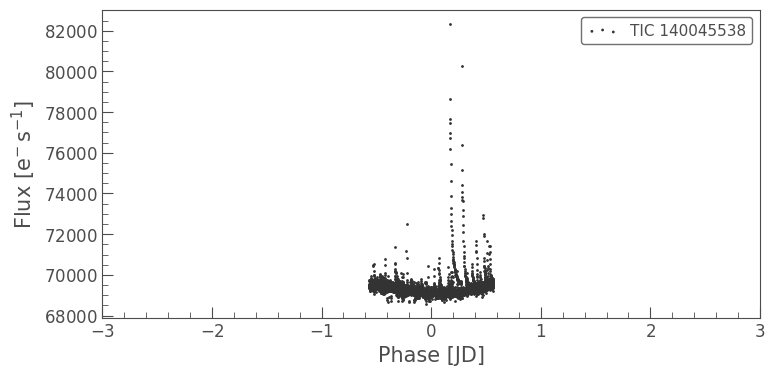

In [9]:
#copy and paste the file path of the tp file
tpf = TessTargetPixelFile("/TESS/MAST_2024-06-18T0507/TESS/tess2018206045859-s0001-0000000140045538-0120-s/tess2018206045859-s0001-0000000140045538-0120-s_tp.fits")
# Show a single snapshot
tpf.plot(frame=42)

# Plot the lightcurve
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
lc.plot()

# Flatten it
flat_lc = lc.flatten()
flat_lc.plot()

# Try and find the period of the most prominent orbiting object
period = np.linspace(1, 5, 10000)
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot()

planet_x_period = bls.period_at_max_power
planet_x_t0 = bls.transit_time_at_max_power
planet_x_dur = bls.duration_at_max_power

# Phase-fold the ligthcurve based on the discovered period at max power
ax = lc.fold(period=planet_x_period, epoch_time=planet_x_t0).scatter()
ax.set_xlim(-3,3)

# Other tweaks

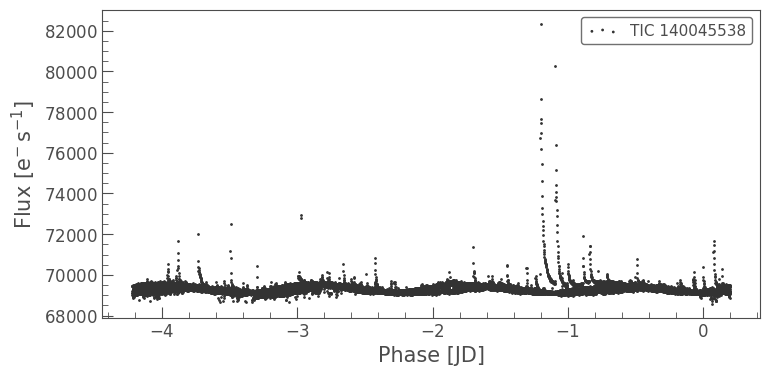

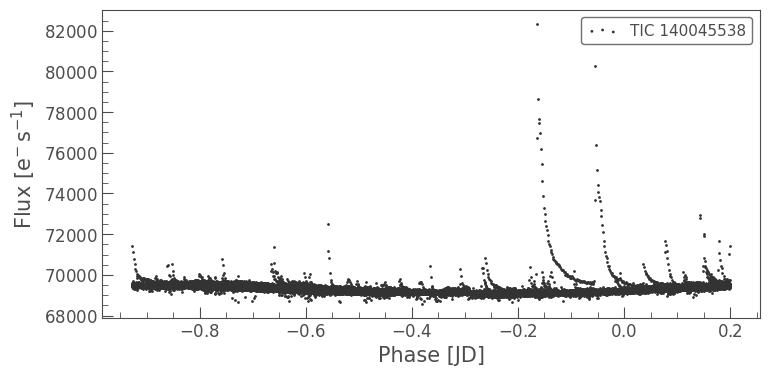

In [18]:
#plot it again with quadruple the period
lc.fold(period=4*bls.period_at_max_power, wrap_phase=0.2).scatter();

#get a more precise period by increasing the number of points
import astropy.units as u
bls = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
bls.period_at_max_power

lc.fold(period=bls.period_at_max_power, wrap_phase=0.2).scatter();